# Stats on Toronto and Manhattan Demographics

In [1]:
import requests
from bs4 import BeautifulSoup

# read the data from wikipedia
wiki_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_Toronto').text
soup = BeautifulSoup(wiki_url,'lxml')

soup.prettify()

'<!DOCTYPE html>\n<html class="client-nojs" dir="ltr" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <title>\n   Demographics of Toronto - Wikipedia\n  </title>\n  <script>\n   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgMonthNamesShort":["","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],"wgRequestId":"Xm2keQpAML8AAzd4eOIAAABJ","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Demographics_of_Toronto","wgTitle":"Demographics of Toronto","wgCurRevisionId":944977846,"wgRevisionId":944977846,"wgArticleId":2578775,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Webarchive template wayback

In [14]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

# Read the data from Age demograpic table
tor_age_d = soup.findAll('table',{'class':'wikitable'})
tor_age_demogr = tor_age_d[1]
tor_age_demogr

# Form the data frame from the table
t_rows = tor_age_demogr.find_all('tr')
t_rows

pdata = [['Age', 'Total', 'Male', 'Female']]

for tr in t_rows:
    th = tr.find_all('td')
    row = [i.text for i in th] 
    rowl = [row]
    pdata = pdata + rowl
    

df = pd.DataFrame(pdata) 

#Formatting the table
df[3].replace(regex=['\n'], value='',inplace=True)

new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header

df.head()

,Age,Total,Male,Female
1,None,None,None,None
2,0 to 14 years,"398,135","204,190","193,945"
3,0 to 4 years,"136,000","69,895","66,105"
4,5 to 9 years,"135,025","69,345","65,680"
5,10 to 14 years,"127,105","64,940","62,165"


### Demographic data of toronto - Formatting and cleaning the data

In [15]:
tor_age_demogr = df.drop([1,2,6,17,22,26]).reset_index(drop=True)
tor_age_demogr

j=0

# Formatting the Age column
for i in tor_age_demogr['Age']:
  two = i.split()
  tor_age_demogr.loc[j, 'Age'] = two[2]
  j = j+1

tor_age_demogr

# Calculate the percentage of Total, Male & Female columns
tor_age_demogr['Total'].replace(regex=[','], value='',inplace=True)
tor_age_demogr['Male'].replace(regex=[','], value='',inplace=True)
tor_age_demogr['Female'].replace(regex=[','], value='',inplace=True)

tor_age_demogr[['Total']] = tor_age_demogr[['Total']].astype("int")
tor_age_demogr[['Male']] = tor_age_demogr[['Male']].astype("int")
tor_age_demogr[['Female']] = tor_age_demogr[['Female']].astype("int")
tor_age_demogr[['Age']] = tor_age_demogr[['Age']].astype("int")


tor_age_demogr['Total'] = (100 * tor_age_demogr['Total'] / tor_age_demogr['Total'].sum()).round(0)
tor_age_demogr['Male'] = (100 * tor_age_demogr['Male'] / tor_age_demogr['Male'].sum()).round(0)
tor_age_demogr['Female'] = (100 * tor_age_demogr['Female'] / tor_age_demogr['Female'].sum()).round(0)
tor_age_demogr.head()

,Age,Total,Male,Female
0,4,5.0,5.0,5.0
1,9,5.0,5.0,5.0
2,14,5.0,5.0,4.0
3,19,5.0,6.0,5.0
4,24,7.0,7.0,7.0


### Demographic data of Manhattan - Formatting and cleaning the data

In [16]:
import lxml.html as lh
import pandas as pd

url='https://www.baruch.cuny.edu/nycdata/population-geography/age_distribution.htm'

html = requests.get(url).content
html

df_list = pd.read_html(html)
df = df_list[-1]
df.to_csv('my data.csv')

man_age_demogr = df[[1, 3]][11:29].reset_index(drop=True)
man_age_demogr.columns=['Age','Total']

man_age_demogr.loc[0, 'Age'] = "0 to 5 years"
man_age_demogr.loc[17, 'Age'] = "more than 85 years"

j=0

# Formatting the Age column
for i in man_age_demogr['Age']:
  two = i.split()
  man_age_demogr.loc[j, 'Age'] =two[2]
  j = j+1


man_age_demogr['Total'].replace(regex=['%'], value='',inplace=True)



man_age_demogr[['Total']] = man_age_demogr[['Total']].astype("float")
man_age_demogr[['Age']] = man_age_demogr[['Age']].astype("int")

man_age_demogr.head()

,Age,Total
0,5,4.8
1,9,3.8
2,14,3.7
3,19,4.2
4,24,7.0


In [17]:
#Binning the Age population - Toronto
bins = np.linspace(0, 85, 5)
group_names = ['0 to 21 years', '22 to 42 years', '42 to 63 years', '63 to 85 years']

tor_age_demogr['age-binned'] = pd.cut(tor_age_demogr['Age'], bins, labels=group_names, include_lowest=True )
man_age_demogr['age-binned'] = pd.cut(man_age_demogr['Age'], bins, labels=group_names, include_lowest=True )

In [18]:
# grouping the data based on Age category
df_group_manage = man_age_demogr.groupby(['age-binned'],as_index=False).sum()
df_group_torage = tor_age_demogr.groupby(['age-binned'],as_index=False).sum()

one = df_group_torage[['age-binned','Total']]
two = df_group_manage[['age-binned','Total']]

Text(0.5, 1.0, 'Age demographics of toronto and manhattan')

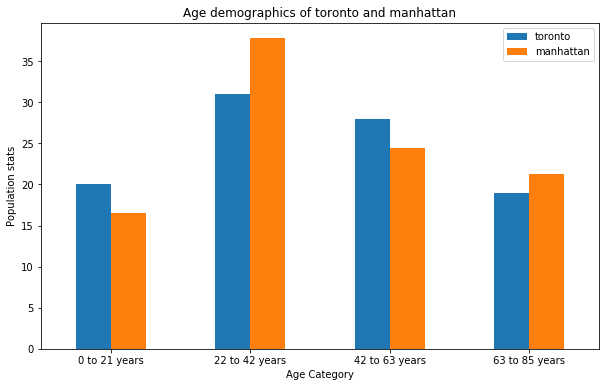

In [19]:
#Age comparision of Toronto and Manhattan

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

df_outer = pd.merge(one, two, on='age-binned', how='outer')
df_outer.columns = ['age','toronto','manhattan']

#pyplot.bar(group_names, df_group_torage['Total'])

df_outer.set_index('age',inplace=True)
df_outer.plot(kind='bar', figsize=(10, 6))

# set x/y labels and plot title
plt.pyplot.xlabel("Age Category")
plt.pyplot.xticks(rotation=0)
plt.pyplot.ylabel("Population stats")
plt.pyplot.title("Age demographics of toronto and manhattan")

Text(0.5, 1.0, 'Race Demographics for Manhattan')

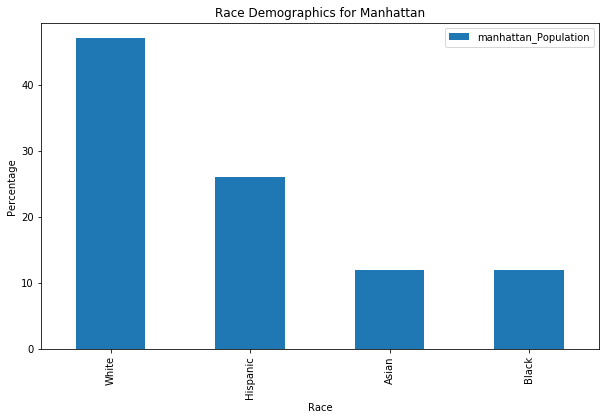

In [20]:
#Race Stats on Manhattan

# Racial population of Manhattan based on 2016-2017 census
df_race_m = [['White',47],['Hispanic',26],['Asian',12],['Black',12]]
df_race_man = pd.DataFrame(df_race_m) 

df_race_man.columns = ['Race','manhattan_Population']
df_race_man

df_race_man.set_index('Race',inplace=True)
df_race_man.plot(kind='bar', figsize=(10, 6))


# set x/y labels and plot title
plt.pyplot.xlabel("Race")
plt.pyplot.ylabel("Percentage")
plt.pyplot.title("Race Demographics for Manhattan")

Text(0.5, 1.0, 'Race Demographics for Toronto')

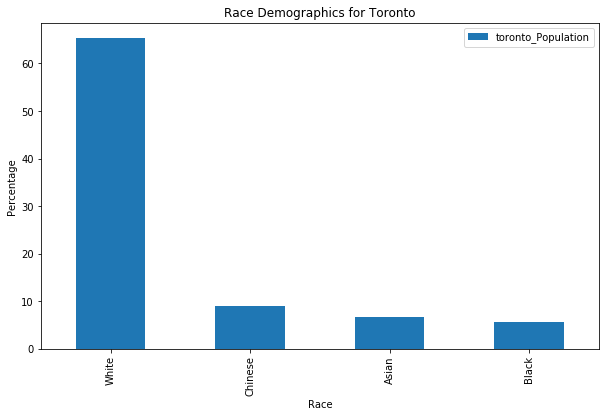

In [21]:
#Race Stats on Toronto

# Racial population of toronto based on 2016-2017 census
df_race = [['White',65.3],['Chinese',8.9],['Asian',6.7],['Black',5.6]]
df_race_tor = pd.DataFrame(df_race) 

df_race_tor.columns = ['Race','toronto_Population']
df_race_tor

df_race_tor.set_index('Race',inplace=True)
df_race_tor.plot(kind='bar', figsize=(10, 6))


# set x/y labels and plot title
plt.pyplot.xlabel("Race")
plt.pyplot.ylabel("Percentage")
plt.pyplot.title("Race Demographics for Toronto")

Text(0.5, 1.0, 'Race Demographics for Toronto')

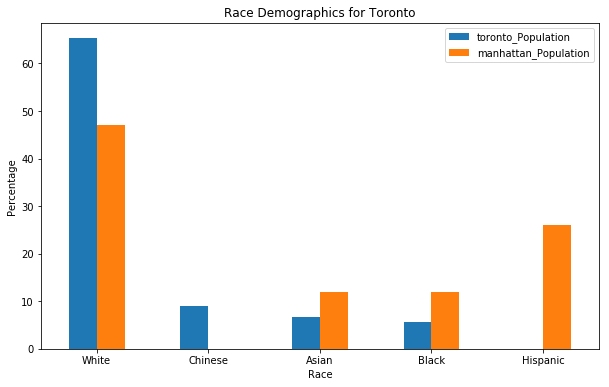

In [22]:
df_inner = pd.merge(df_race_tor, df_race_man, on='Race', how='outer')
df_inner

df_inner.plot(kind='bar', figsize=(10, 6))


# set x/y labels and plot title
plt.pyplot.xlabel("Race")
plt.pyplot.xticks(rotation=0)
plt.pyplot.ylabel("Percentage")
plt.pyplot.title("Race Demographics for Toronto")

By comparing the demographics of age it is evident that there is no major changes in distribution of the students, young, middle age, retired peoples in both Toronto & New York.

By comparing the demographics of Race we can see few notable differences in both the cities.
•	Toronto has more population of White than Manhattan
•	Toronto has Chinese population where as Manhattan has Hispanic population
•	Toronto has comparatively less population of Asian and Black than Manhattan
